# Домашнее задание №5

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import math
from scipy.stats import beta

## ***Задача 1: распределение верхних экстремумов для показательной модели***

### **1.** Зафиксируйте $n$.

In [37]:
n = 100

### **2.** Сгенерируйте $K = n^2$ выборок $(X_1^k, X_2^k, ... , X_n^k)$ объема $n$ из экспоненциального распределения $\operatorname{Exp}(1)$. В каждой из $K$ выборок определить максимум $X_{(n)}^k$, $1 \le k \le n$.

In [38]:
K = n**2

samples = np.random.exponential(size=(K, n))
maxima = np.max(samples, axis=1)

### **3.** Вычислите функцию \begin{equation}
    \hat G_K(x) = \cfrac{1}{K} \sum\limits_{k=1}^{K}\mathbb{1}\left(X_{(n)}^k - \ln n \le x \right), \;\;\; x \ge 0.
\end{equation} и постройте графики зависимостей $\hat G_K(x)$ и $G(x) = e^{-e^{-x}}$ от $x$.

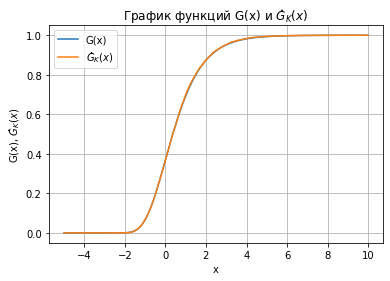

In [39]:
def G(x):
    return np.exp(-np.exp(-x))

def G_hat(x, maxima):
    return np.mean(maxima - np.log(n) <= x)

x_values = np.linspace(-5, 10, num=K)

G_values = G(x_values)
G_hat_values = np.array([G_hat(x, maxima) for x in x_values])

plt.plot(x_values, G_values, label='G(x)')
plt.plot(x_values, G_hat_values, label='$Ĝ_K(x)$')
plt.legend()
plt.xlabel('x')
plt.ylabel('G(x), $Ĝ_K(x)$')
plt.title('График функций G(x) и $Ĝ_K(x)$')
plt.grid(True)
plt.show()

### **4.** Убедитесь, что $\hat G_K$ близка к $G(x) = e^{-e^{-x}}$. Для этого вычислите \begin{equation}
    T_K = \operatorname{sup}\limits_{x \ge 0} \left| \hat G_K(x) - G(x) \right|.
\end{equation} Обратите внимание, что $\hat G_K$ -- кусочно постоянная функция, а G - монотонная. Поэтому значение статистики $T_K$ можно найти точно.

In [40]:
G_values = G(x_values)
G_hat_values = np.array([G_hat(x, maxima) for x in x_values])
T_K = np.max(np.abs(G_hat_values - G_values))

print('Значение статистики T_K:', T_K)

Значение статистики T_K: 0.006888547388590793


### **5.** Повторите задания пп. 1, 2 и 4 при различных $n$. Постройте график зависимости $T_K$ от $n$. Необходимо взять не менее $10$ различных значений $n$. Графики функций $\hat G_K$ и $G$ (см. п.3) можно построить при одном фиксированном значении $n$ на Ваш выбор.

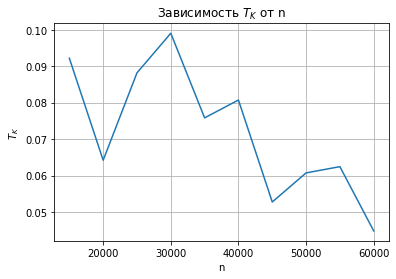

In [41]:
import numpy as np
import matplotlib.pyplot as plt


# функция для вычисления статистики Т_K
def compute_T(K, n):
    # генерируем выборки и вычисляем максимумы
    samples = np.random.exponential(size=(K, n))
    maxima = np.max(samples, axis=1)
    
    # вычисляем G^_K(x)
    G_K = np.mean(maxima.reshape(K, 1) - np.log(n) <= x_values, axis=0)
    
    # вычисляем значение функции G(x)
    G = np.exp(-np.exp(-x_values))
    
    # вычисляем статистику T_K
    T_K = np.max(np.abs(G_K - G))
    
    return T_K

# значения n, для которых будем рассчитывать T_K
n_values = [15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000]

# значения x для построения графика
x_values = np.linspace(0, 8, 1000)

# количество выборок для каждого n
K = 100

# вычисляем T_K для каждого n
T_K_values = []
for n in n_values:
    T_K = compute_T(K, n)
    T_K_values.append(T_K)

# строим график зависимости T_K от n
plt.plot(n_values, T_K_values)
plt.xlabel('n')
plt.ylabel('$T_K$')
plt.title('Зависимость $T_K$ от n')
plt.grid(True)
plt.show()


Из графика видно, что статистика $T_K$ убывает с ростом $n$, что подтверждает сходимость $Ĝ_K(x)$ к $G(x)$ при увеличении размера выборки.

##  ***Задача 2: распределение порядковых статистик равномерного распределенияю***


### **1.** Зафиксируйте $n \in \mathbb{N}$ и натуральное $r$ от $1$ до $n$.

In [57]:
n = 100
r = 50

### **2.** Сгенерируйте $K = n^2$ выборок $\left( X_1^k, ... , X_n^k \right)$, $1 \le k \le K$, объёма $n$ из равномерного распределения на отрезке $\left[ 0, 1 \right]$. В каждой из $K$ выборок определить $r$-ую порядковую статистику $X_{(r)}^k$.

In [58]:
K = n**2
X_r = np.zeros(K)
for k in range(K):
    sample = np.random.uniform(size=n)
    X_r[k] = np.partition(sample, r-1)[r-1]

### **3.**  По набору наблюдений $X_{(r)}^1, ... , X_{(r)}^K$ постройте гистограмму. На тот же рисунок добавьте график плотности распределения $\operatorname{Beta}(r, n + 1 - r)$.

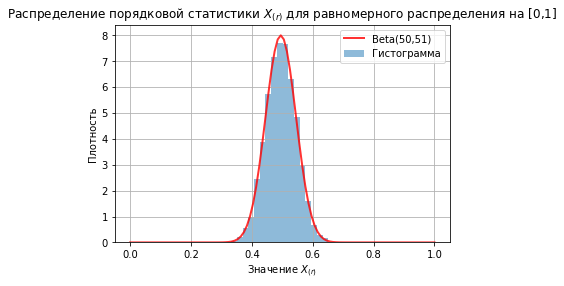

In [59]:
plt.hist(X_r, bins=20, density=True, alpha=0.5)
x = np.linspace(0, 1, n)
plt.plot(x, beta.pdf(x, r, n+1-r), 'r-', lw=2, alpha=0.8)
plt.legend(['Beta({},{})'.format(r, n+1-r), 'Гистограмма'])
plt.xlabel('Значение $X_{(r)}$')
plt.ylabel('Плотность')
plt.title('Распределение порядковой статистики $X_{(r)}$ для равномерного распределения на [0,1]')
plt.grid(True)
plt.show()

### **4.** Убедитесь, что эмпирическая функция распределения \begin{equation} \hat F_K(t) = \cfrac{1}{K} \sum\limits_{k = 1}^{K}\mathbb{1}\left( X_{(r)}^k \le t \right), \;\;\; t \in [0, 1] \end{equation} близка к функции распределения $\operatorname{Beta}(r, n + 1 − r)$. Для этого вычислите \begin{equation} T_K = \operatorname{sup}_{t \ge 0} \left| \hat F_K(t) - G_{r, n+1-r}(t) \right|, \end{equation} где $G_{r, n + 1 - r}$  - функция распределения $\operatorname{Beta}(r, n + 1 - r)$ (доступна в библиотеке scipy). Обратите внимание, что $\hat F_K$ - кусочно постоянная функция, а $G_{r, n+1-r}$ - монотонная. Поэтому значение статистики $T_K$ можно найти точно.

In [60]:
def G(t):
    return beta.cdf(t, r, n+1-r)

# Определяем функцию эмпирической функции распределения
def F_hat(t, X_r):
    return np.mean(X_r <= t)

# Вычисляем значение статистики
t = np.linspace(0, 1, K)
T_K = np.max(np.abs(F_hat(t, X_r) - G(t)))

print('Значение статистики T_K:', T_K)

Значение статистики T_K: 0.5047


### **5.** Повторите задания пп. 1, 2, 4 при различных значениях $r$ и $n$. При каждом $r$ постройте график зависимости $T_K$ от $n$. Убедитесь, что значение $T_K$ стремится к нулю с ростом $r$. Необходимо выбрать не менее трех различных значений $r$ и не менее $10$ различных значений $n$. Гистограмму (см. п. 3) можно построить при одном фиксированном значении $n$ на Ваш выбор.

In [61]:
def calculate_T_K(r, n):
    # Генерируем выборку
    X_r = np.zeros(K)
    for k in range(K):
      sample = np.random.uniform(size=n)
      X_r[k] = np.partition(sample, r-1)[r-1]
    
    # Определяем функцию Beta распределения
    def G(t):
        return beta.cdf(t, r, n+1-r)
    
    # Определяем функцию эмпирической функции распределения
    def F_hat(t, X_r):
        return np.mean(X_r <= t)
    
    # Вычисляем значение статистики
    t = np.linspace(0, 1, K)
    T_K = np.max(np.abs(F_hat(t, X_r) - G(t)))
    
    return T_K


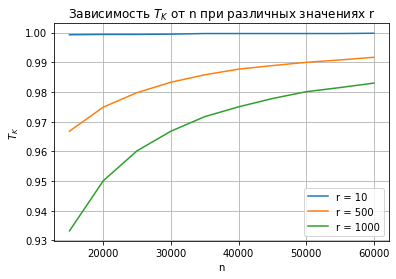

In [63]:
r_values = [10, 500, 1000]
n_values = [15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000]

for r in r_values:
    T_Ki = [calculate_T_K(r, n) for n in n_values]
    plt.plot(n_values, T_Ki, label=f'r = {r}')

plt.legend()
plt.title('Зависимость $T_K$ от n при различных значениях r')
plt.xlabel('n')
plt.ylabel('$T_K$')
plt.grid(True)
plt.show()

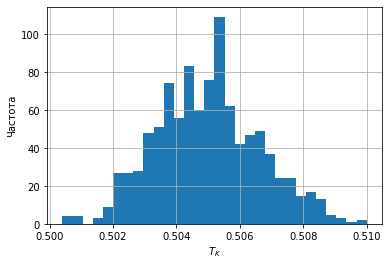

In [66]:
n = 100
r = 50
T_Ks = [calculate_T_K(r, n) for _ in range(1000)]
plt.hist(T_Ks, bins=30)
plt.xlabel('$T_K$')
plt.ylabel('Частота')
plt.grid(True)
plt.show()
